In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta

### Make a dataframe of contacts

Two columns total.  A ContactID, and an indicator of list or referral.
105200 total contacts:
1. 50000 contacts from a PA list,
2. 50000 contacts from a MD list,
3. 5200 contacts on no list but called in based on a referral (RF)


### Columns
- **ContactID**: unique identitier for the contact
- **ListID**: identities the source of the contact information.  Possible values are PA for Pennsylvania list, MD for Maryland list, or RF for Referral contact

In [2]:
nums = pd.Series(np.arange(10001,60001,1))

In [3]:
pa = pd.Series('PA', index=range(50000))
md = pd.Series('MD', index=range(50000))

In [4]:
pa_df = pd.DataFrame({'ListID': pa, 'CtNum': nums})
pa_df['ContactID'] = pa_df['ListID'] + pa_df['CtNum'].astype(str)

In [5]:
md_df = pd.DataFrame({'ListID': md, 'CtNum': nums})
md_df['ContactID'] = md_df['ListID'] + md_df['CtNum'].astype(str)

In [6]:
contacts_df = pd.concat([pa_df, md_df], ignore_index=True)

In [7]:
contacts_df = contacts_df.drop('CtNum', axis=1)

In [8]:
contacts_df

,ListID,ContactID
0,PA,PA10001
1,PA,PA10002
2,PA,PA10003
3,PA,PA10004
4,PA,PA10005
...,...,...
99995,MD,MD59996
99996,MD,MD59997
99997,MD,MD59998
99998,MD,MD59999


### Make a dataframe for outreach.

On the first of every month, 10000 letters are mailed. There are 5000 each for the PA and MD list.  Half the outreach are letter "A" and half are letter "B".  Additionally, half of the recipients recieve a followup email, and there is a column to indicate whether there was followup.

### Columns
- **OutreachID**: unique identifier
- **ContactID**: Foreign key for the contact table
- **Outreach Date**: Date of the outreach letter, always the first of the month
- **LetterID**:  Identities the letter type that was sent for outreach
- **FollowupInd**: Indicates whether the letter had a text followup sent

In [9]:
jan_1 = pd.concat([contacts_df.loc[0:4999, 'ContactID'], contacts_df.loc[50000:54999, 'ContactID']], ignore_index=True)
feb_1 = pd.concat([contacts_df.loc[5000:9999, 'ContactID'], contacts_df.loc[55000:59999, 'ContactID']], ignore_index=True)
mar_1 = pd.concat([contacts_df.loc[10000:14999, 'ContactID'], contacts_df.loc[60000:64999, 'ContactID']], ignore_index=True)
apr_1 = pd.concat([contacts_df.loc[15000:19999, 'ContactID'], contacts_df.loc[65000:69999, 'ContactID']], ignore_index=True)
may_1 = pd.concat([contacts_df.loc[20000:24999, 'ContactID'], contacts_df.loc[70000:74999, 'ContactID']], ignore_index=True)
jun_1 = pd.concat([contacts_df.loc[25000:29999, 'ContactID'], contacts_df.loc[75000:79999, 'ContactID']], ignore_index=True)
jul_1 = pd.concat([contacts_df.loc[30000:34999, 'ContactID'], contacts_df.loc[80000:84999, 'ContactID']], ignore_index=True)
aug_1 = pd.concat([contacts_df.loc[35000:39999, 'ContactID'], contacts_df.loc[85000:89999, 'ContactID']], ignore_index=True)
sep_1 = pd.concat([contacts_df.loc[40000:44999, 'ContactID'], contacts_df.loc[90000:94999, 'ContactID']], ignore_index=True)
oct_1 = pd.concat([contacts_df.loc[45000:49999, 'ContactID'], contacts_df.loc[95000:99999, 'ContactID']], ignore_index=True)
contact_id = pd.concat([jan_1, feb_1, mar_1, apr_1, may_1, jun_1, jul_1, aug_1, sep_1, oct_1], ignore_index=True)

In [10]:
jan_2 = pd.Series('2025-01-01', index=range(10000))
feb_2 = pd.Series('2025-02-01', index=range(10000))
mar_2 = pd.Series('2025-03-01', index=range(10000))
apr_2 = pd.Series('2025-04-01', index=range(10000))
may_2 = pd.Series('2025-05-01', index=range(10000))
jun_2 = pd.Series('2025-06-01', index=range(10000))
jul_2 = pd.Series('2025-07-01', index=range(10000))
aug_2 = pd.Series('2025-08-01', index=range(10000))
sep_2 = pd.Series('2025-09-01', index=range(10000))
oct_2 = pd.Series('2025-10-01', index=range(10000))
contact_date = pd.concat([jan_2, feb_2, mar_2, apr_2, may_2, jun_2, jul_2, aug_2, sep_2, oct_2], ignore_index=True)

In [11]:
Letter_sent = ["A","A","B","B"]* 25000
Text_fu = ["Y","N","Y","N"]* 25000
out = pd.Series('OUT', index=range(100000))
nums_out = pd.Series(np.arange(100001,200001,1))
out_id = out + nums_out.astype(str)

In [12]:
outreach_df = pd.DataFrame({'OutreachID': out_id, 'ContactID': contact_id, 'OutreachDate': contact_date, 'LetterID': Letter_sent, 'FollowupInd': Text_fu})

In [13]:
outreach_df

,OutreachID,ContactID,OutreachDate,LetterID,FollowupInd
0,OUT100001,PA10001,2025-01-01,A,Y
1,OUT100002,PA10002,2025-01-01,A,N
2,OUT100003,PA10003,2025-01-01,B,Y
3,OUT100004,PA10004,2025-01-01,B,N
4,OUT100005,PA10005,2025-01-01,A,Y
...,...,...,...,...,...
99995,OUT199996,MD59996,2025-10-01,B,N
99996,OUT199997,MD59997,2025-10-01,A,Y
99997,OUT199998,MD59998,2025-10-01,A,N
99998,OUT199999,MD59999,2025-10-01,B,Y


### Make a dataframe of Answered Calls

In response to the outreach letters, some contacts will call the contact center to go through screening.  The 'Response Rate' is defined as the number of callers divided by the number of letters sent.  Since this is fabricated datase, by design we are varying the Response Rate based on four variables: 
- Response rates are higher from PA than from MD
- Response rates to Letter A and higher than to Letter B
- Response rates are higher for recipients of a followup text
- Response rates are higher for the first half of the year.  By the second half the data has become stale

This leads to 16 possible segments which are assigned to the outreach table, and then responses are pulled into a call table.

### Columns:

- **CallID**: unique identifier
- **OutreachID**: Foreign Key to outreach table
- **ContactID**: Foreign Key to contact table
- **OutreachDate**: Date Outreach was sent
- **CallDate**: Date Call was receive
- **CallLag**: days between outreach sent and call received

In [14]:
conditions = [
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('PA')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] < '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'Y') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'A') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD')),
 (outreach_df['LetterID'] == 'B') & (outreach_df['FollowupInd'] == 'N') & (outreach_df['OutreachDate'] > '2025-05-15') & (outreach_df['ContactID'].str.startswith('MD'))
]
segments = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

In [15]:
outreach_df['OutreachSegment'] = np.select(conditions,segments)

In [16]:
# df = pd.concat([df, new_row_df], ignore_index=True)
calls_df_a = outreach_df.query("OutreachSegment == 1").sample(frac=0.18)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 2").sample(frac=0.13)], ignore_index = True)
calls_df_b = outreach_df.query("OutreachSegment == 3").sample(frac=0.13)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 4").sample(frac=0.09)], ignore_index = True)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 5").sample(frac=0.15)], ignore_index = True)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 6").sample(frac=0.11)], ignore_index = True)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 7").sample(frac=0.10)], ignore_index = True)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 8").sample(frac=0.08)], ignore_index = True)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 9").sample(frac=0.15)], ignore_index = True)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 10").sample(frac=0.11)], ignore_index = True)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 11").sample(frac=0.10)], ignore_index = True)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 12").sample(frac=0.08)], ignore_index = True)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 13").sample(frac=0.12)], ignore_index = True)
calls_df_a = pd.concat([calls_df_a, outreach_df.query("OutreachSegment == 14").sample(frac=0.09)], ignore_index = True)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 15").sample(frac=0.08)], ignore_index = True)
calls_df_b = pd.concat([calls_df_b, outreach_df.query("OutreachSegment == 16").sample(frac=0.06)], ignore_index = True)

The timing of response to each segment of mail outreach follows a random distribution below to generate a 'Call Lag' which is the number of days between mailing and response.

We give a slightly different lag based on whether followup text was sent.

<Axes: >

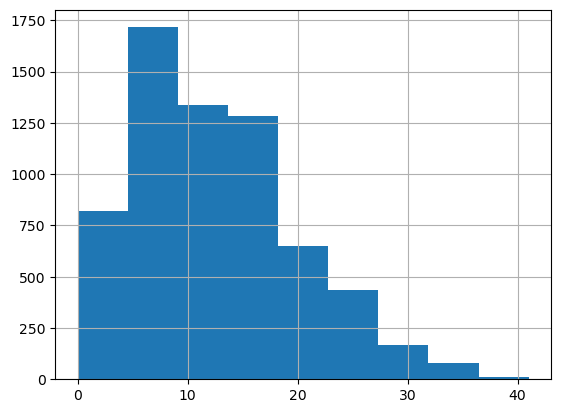

In [17]:
numbers_a = np.random.beta(2, 6, len(calls_df_a))*50
rnd_num_a = pd.Series([round(num, 0) for num in numbers_a])
calls_df_a['CallLag'] = rnd_num_a
numbers_b = np.random.beta(4, 4, len(calls_df_b))*50
rnd_num_b = pd.Series([round(num, 0) for num in numbers_b])
calls_df_b['CallLag'] = rnd_num_b
calls_df = pd.concat([calls_df_a,calls_df_b], ignore_index = True)
rnd_num_a.hist(bins=9) # Creates a histogram with 5 bins

<Axes: >

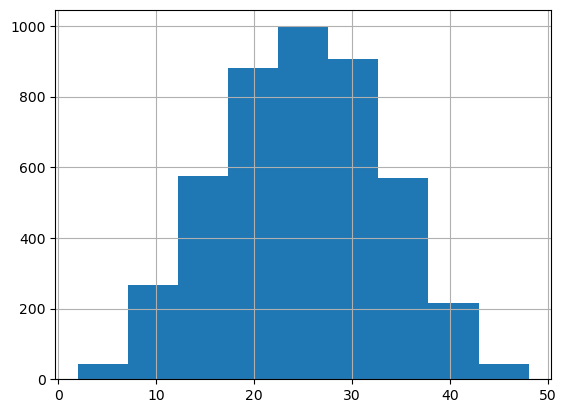

In [18]:
rnd_num_b.hist(bins=9) # Creates a histogram with 5 bins

In [19]:
calls_df['OutreachDate'] = pd.to_datetime(calls_df['OutreachDate'])

In [20]:
calls_df['CallDate'] = calls_df['OutreachDate'] + pd.to_timedelta(calls_df['CallLag'], unit='D')

In [21]:
nums_rsp = pd.Series(np.arange(10001,len(calls_df) + 10001,1))
call_rsp = pd.Series('RSP', index=range(len(calls_df)))
calls_df['CallNum'] = nums_rsp
calls_df['CallRsp'] = call_rsp
calls_df['CallID'] = calls_df['CallRsp'] + calls_df['CallNum'].astype(str)

In [22]:
calls_df = calls_df.drop(columns=['LetterID', 'FollowupInd','OutreachSegment','CallNum','CallRsp']) 
new_order = ['CallID', 'OutreachID','ContactID','OutreachDate','CallDate', 'CallLag']
calls_df = calls_df[new_order]

In [23]:
calls_df

,CallID,OutreachID,ContactID,OutreachDate,CallDate,CallLag
0,RSP10001,OUT111865,PA16865,2025-02-01,2025-02-14,13.0
1,RSP10002,OUT114641,PA19641,2025-02-01,2025-02-16,15.0
2,RSP10003,OUT143525,PA33525,2025-05-01,2025-05-14,13.0
3,RSP10004,OUT133461,PA28461,2025-04-01,2025-04-06,5.0
4,RSP10005,OUT111217,PA16217,2025-02-01,2025-02-04,3.0
...,...,...,...,...,...,...
10995,RSP20996,OUT195272,MD55272,2025-10-01,2025-10-20,19.0
10996,RSP20997,OUT177968,MD47968,2025-08-01,2025-08-21,20.0
10997,RSP20998,OUT155908,MD35908,2025-06-01,2025-06-17,16.0
10998,RSP20999,OUT185620,MD50620,2025-09-01,2025-10-05,34.0


Add a little randomnness by only pulling 90% of the calls.

In [24]:
calls_df = calls_df.sample(frac=0.90)

In [25]:
calls_df

,CallID,OutreachID,ContactID,OutreachDate,CallDate,CallLag
10929,RSP20930,OUT195292,MD55292,2025-10-01,2025-11-11,41.0
7742,RSP17743,OUT142740,PA32740,2025-05-01,2025-05-22,21.0
8965,RSP18966,OUT160756,PA40756,2025-07-01,2025-07-23,22.0
3285,RSP13286,OUT164091,PA44091,2025-07-01,2025-07-05,4.0
2047,RSP12048,OUT190789,PA55789,2025-10-01,2025-10-21,20.0
...,...,...,...,...,...,...
3904,RSP13905,OUT147005,MD32005,2025-05-01,2025-05-10,9.0
5969,RSP15970,OUT197739,MD57739,2025-10-01,2025-10-20,19.0
1993,RSP11994,OUT172285,PA47285,2025-08-01,2025-08-24,23.0
5665,RSP15666,OUT179017,MD49017,2025-08-01,2025-08-31,30.0


### Make a dataframe of submitted applications

Assume that 90% of the calls from PA outreach resulted in an application and 80% of the calls in MD resulted in an application.

This is based on the assumption that the list provided by the PA agency was more likely to contact successful applicants

### Columns

- **AppID:** Unique identifier for the application
- **CallID:** Foreign Key to the call table
- **ContactID:** Foreign Key to the contact table
- **SubmissionDate:** Date of the application submission (same as call date in this scenario)

In [26]:
apps_pa = calls_df.loc[calls_df['ContactID'].str.startswith('PA'),('ContactID','CallID','CallDate')].sample(frac=0.9)
apps_md = calls_df.loc[calls_df['ContactID'].str.startswith('MD'),('ContactID','CallID','CallDate')].sample(frac=0.8)

In [27]:
applications_df = pd.concat([apps_pa, apps_md], ignore_index = True)
applications_df = applications_df.rename(columns={'CallDate': 'SubmissionDate'})

In [28]:
nums_app = pd.Series(np.arange(10001,len(applications_df) + 10001,1))
call_app = pd.Series('APP', index=range(len(applications_df)))
applications_df['AppNum'] = nums_app
applications_df['AppRsp'] = call_app
applications_df['AppID'] = applications_df['AppRsp'] + applications_df['AppNum'].astype(str)

In [29]:
#calls_df = calls_df.drop(columns=['AppNum', 'AppRsp']) 
new_order = ['AppID', 'CallID','ContactID','SubmissionDate']
applications_df = applications_df[new_order]

In [30]:
applications_df

,AppID,CallID,ContactID,SubmissionDate
0,APP10001,RSP12698,PA43613,2025-07-11
1,APP10002,RSP16938,PA13782,2025-01-27
2,APP10003,RSP11937,PA20751,2025-03-14
3,APP10004,RSP10977,PA23793,2025-03-06
4,APP10005,RSP10624,PA12189,2025-01-03
...,...,...,...,...
8461,APP18462,RSP20691,MD38904,2025-06-18
8462,APP18463,RSP19409,MD26998,2025-04-24
8463,APP18464,RSP16038,MD35019,2025-06-08
8464,APP18465,RSP16378,MD44467,2025-07-18


### Make dataframe of enrollment

This table will contain a record for every submissed application and then an indicator of the status, which might be ENR (enrolled), DEN (denied), or UNK (unknown).

The outcomes are randomly assigned according to a distribution.  In PA, 60% enrolled, 30% denied, and 10% unknown.  In MD, 70% enrolled, 20% denied, and 10% unknown.

This is based on the assumption, that once an application is submitted, the barriers to enrollment are lower in MD. 

### Columns

- **AppID:** Foreign Key to the application table
- **EnrollOutcome:** Outcome of the application submission as reported by the state agency

In [31]:
enr_pa = applications_df.loc[applications_df['ContactID'].str.startswith('PA'),'AppID']
enr_md = applications_df.loc[applications_df['ContactID'].str.startswith('MD'),'AppID']
enr_pa_df = pd.DataFrame({'AppID': enr_pa})
enr_md_df = pd.DataFrame({'AppID': enr_md})

In [32]:
categories_pa = ['UNK','DEN','DEN','DEN','ENR','ENR','ENR','ENR','ENR','ENR']
categories_md = ['UNK','DEN','DEN','ENR','ENR','ENR','ENR','ENR','ENR','ENR']
enr_pa_df['EnrollOutcome'] = np.random.choice(categories_pa, size=len(enr_pa_df), replace=True)
enr_md_df['EnrollOutcome'] = np.random.choice(categories_md, size=len(enr_md_df), replace=True)


In [33]:
enrollment_df = pd.concat([enr_pa_df,enr_md_df],ignore_index=True)

In [34]:
enrollment_df

,AppID,EnrollOutcome
0,APP10001,ENR
1,APP10002,DEN
2,APP10003,ENR
3,APP10004,ENR
4,APP10005,ENR
...,...,...
8461,APP18462,ENR
8462,APP18463,ENR
8463,APP18464,ENR
8464,APP18465,DEN


### Export the tables to CSV files

In [35]:
outreach_df.to_csv('outreach.csv', index = False)
calls_df.to_csv('calls.csv', index = False)
applications_df.to_csv('applications.csv', index = False)
enrollment_df.to_csv('enroll.csv', index = False)

In [36]:
contacts_df.to_csv('contacts.csv', index = False)